# Mood Experiments

Experiments based on following papers: [Eldar et al., 2016](https://www.sciencedirect.com/science/article/pii/S1364661315001746), and [Bennett et al., 2022](https://psycnet.apa.org/record/2021-84803-001).

In [1]:
# Uncomment below lines and run this cell to install neuronav and requirements for colab.

#!git clone https://github.com/awjuliani/neuro-nav
#!pip install ./neuro-nav[experiments_remote]

In [2]:
from neuronav.envs.grid_env import GridEnv, GridSize
from neuronav.agents.td_agents import MoodQ
from neuronav.envs.grid_templates import GridTemplate
from neuronav.utils import run_episode
import matplotlib.pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'retina'

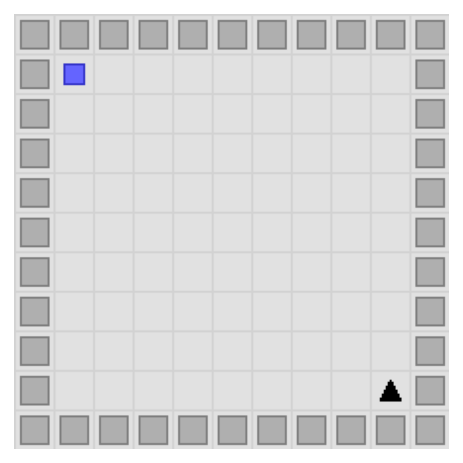

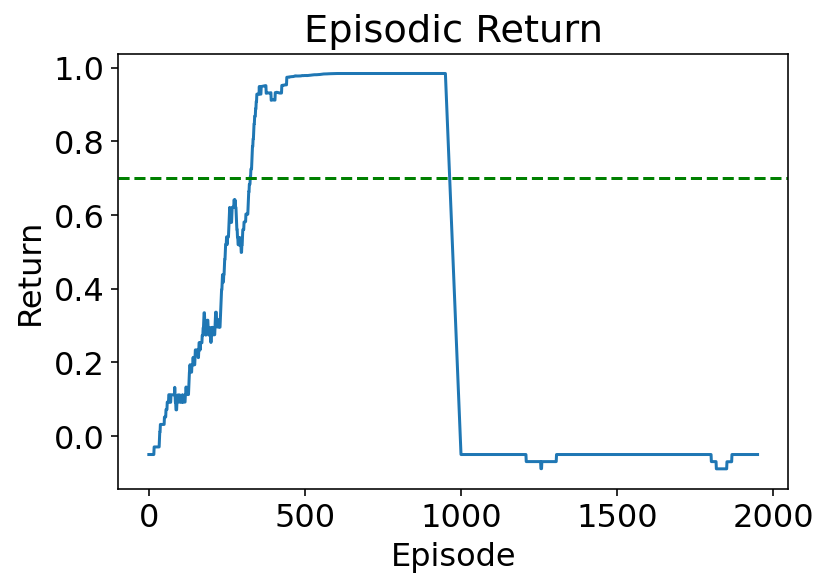

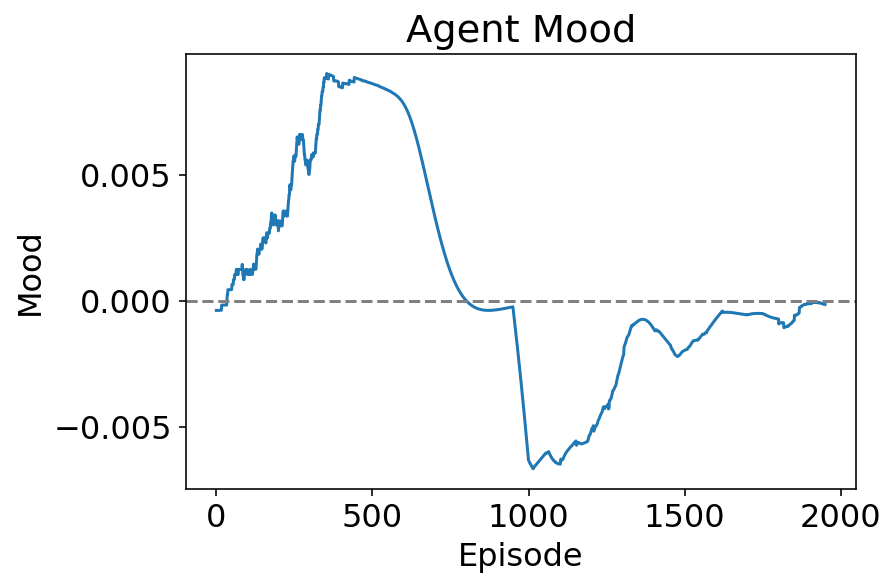

In [6]:
env = GridEnv(size=GridSize.small, template=GridTemplate.empty)
objects = {"rewards": {(1, 1): 1}}
obs = env.reset(objects=objects)
env.render()

num_episodes = 2000
num_steps = 50
lr = 5e-2

agent = MoodQ(
    env.state_size,
    env.action_space.n,
    lr=lr,
    poltype="softmax",
    beta=1e3,
    lr_neg=lr,
    mood_lr=1e-2,
    mood_factor=1,
)

returns = []
moods = []
for i in range(num_episodes):
    if i == 1000:
        # add a negative reward
        objects["rewards"] = {(5, 5): -1}
    agent, steps, ep_return = run_episode(
        env, agent, num_steps, objects=objects, update_agent=True, time_penalty=-0.001
    )
    moods.append(agent.mood)
    returns.append(ep_return)

# set larger font for plots
plt.rcParams.update({"font.size": 16})

factor = 50
# smooth returns
returns = np.convolve(returns, np.ones((factor,)) / factor, mode="valid")
plt.plot(returns)
plt.title("Episodic Return")
# add dotted line at 0.7
plt.axhline(y=0.7, color="green", linestyle="--")
# label x axis
plt.xlabel("Episode")
# label y axis
plt.ylabel("Return")
plt.show()
# smooth moods
moods = np.convolve(moods, np.ones((factor,)) / factor, mode="valid")
plt.plot(moods)
plt.title("Agent Mood")
# add dotted line at 0
plt.axhline(y=0, color="grey", linestyle="--")
# label x axis
plt.xlabel("Episode")
# label y axis
plt.ylabel("Mood")
plt.show()

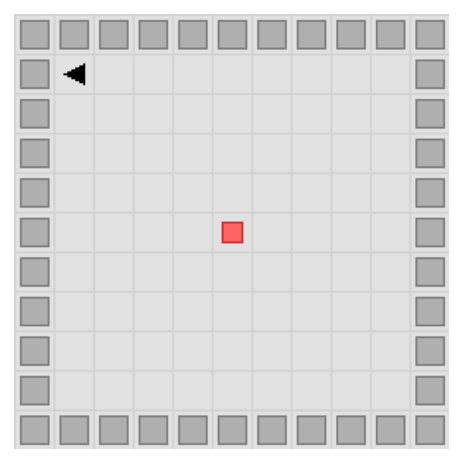

In [4]:
env.render()